In [84]:
from matplotlib.image import imread
from matplotlib.image import imsave
from matplotlib.pyplot import imshow
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt



In [34]:
class BaseImage:
    data: np.ndarray

    def __init__(self, path: str = None) -> None:
        if(path is None):
            return
        else:
            self.data = ((imread(path))*255).astype('uint8')

    def save_img(self, path: str) -> None:
        imsave(path, self.data)

    def show_img(self) -> None:
        plt.imshow(self.data)
        plt.show()

    def get_layer(self, layer_id: int) -> 'BaseImage':
        layer = self.data[:, :, layer_id]
        return layer

In [47]:
class GrayScaleTransform(BaseImage):

    def to_gray(self) -> BaseImage:
        pixels = np.empty(shape=(self.data.shape[0], self.data.shape[1]))
        for x in range(self.data.shape[0]):
            for y in range(self.data.shape[1]):
                red = self.data[x,y][0]
                green = self.data[x,y][1]
                blue = self.data[x,y][2]
                value = 0.30*red + 0.59*green + 0.11*blue
                pixels[x, y] = value

        gray = BaseImage()
        gray.data = pixels
        return gray

In [76]:
class Histogram:
    """
    klasa reprezentujaca histogram danego obrazu
    """
    values: np.ndarray  # atrybut przechowujacy wartosci histogramu danego obrazu

    def __init__(self, values: np.ndarray) -> None:
        self.values = values

    def plot(self) -> None:
        #metoda wyswietlajaca histogram na podstawie atrybutu values
        if self.values.ndim == 2:
            plt.figure()
            histogram, bin_edges = np.histogram(self.values, bins=256, range=(0, 256))
            plt.title("Histogram szarosci")
            plt.xlabel("wartosc szarosci")
            plt.ylabel("liczba pixeli")
            plt.plot(bin_edges[0:-1], histogram)
        elif self.values.ndim == 3:
            plt.figure()
            plt.xlim([0, 256])
            kolorki = ["red", "green", "blue"]
            for i in range(3):
                histogram, bin_edges = np.histogram(
                    self.values[:, :, i], bins=256, range=(0, 256)
                )
                plt.plot(bin_edges[0:-1], histogram, color=kolorki[i])

                plt.title("Histogram")
                plt.xlabel("Wartości kolorów")
                plt.ylabel("Liczba pixeli")


In [77]:
class ImageDiffMethod(Enum):
    mse = 0
    rmse = 1
class ImageComparison(BaseImage):
    def histogram(self) -> Histogram:
        """
        metoda zwracajaca obiekt zawierajacy histogram biezacego obrazu (1- lub wielowarstwowy)
        """
        return Histogram(values=self.data)


    def compare_to(self, other: 'Image', method: ImageDiffMethod) -> float:
        """
        metoda zwracajaca mse lub rmse dla dwoch obrazow
        """
        pass

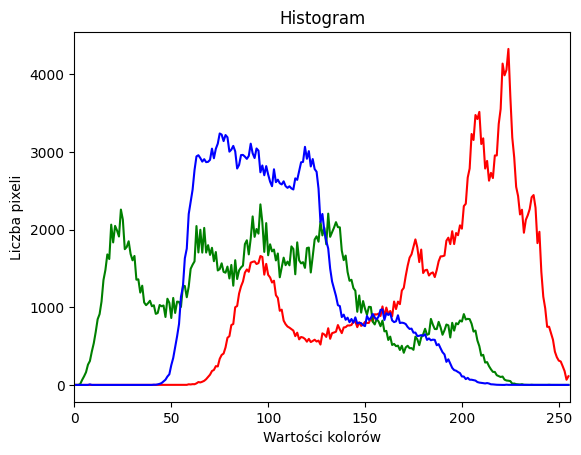

In [78]:
zm = BaseImage('Lenna.jpg')
histogram = Histogram(values=zm.data)
histogram.plot()

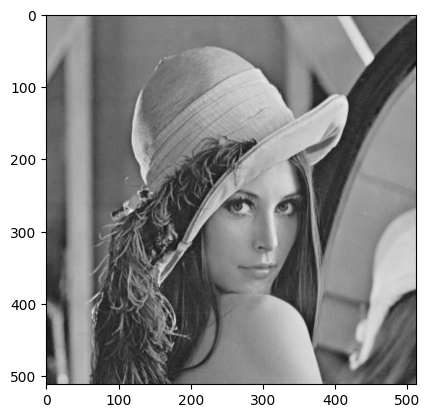

In [86]:
gray = GrayScaleTransform('Lenna.jpg').to_gray()
gray.data = np.dstack((gray.data,gray.data,gray.data))
gray.show_img()

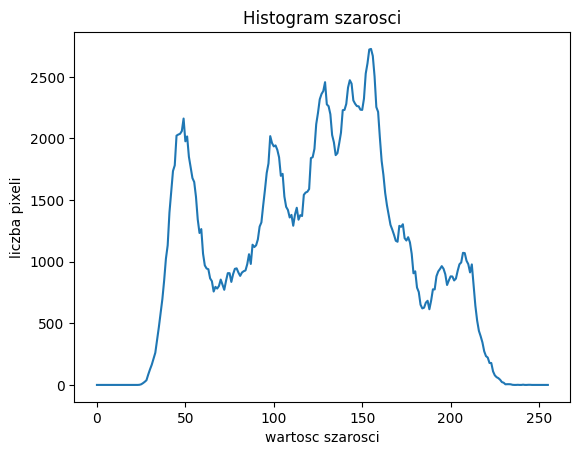

In [85]:
histogram = Histogram(values=gray.data)
histogram.plot()
